#Final Submission

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def splitdata(data, labels, Nt):
    """
    Split the data into training and test sets.

    Parameters:
    - data: Feature vectors
    - labels: Corresponding labels
    - Nt: Number of vectors to use for training

    Returns:
    - train_data: Training feature vectors
    - test_data: Test feature vectors
    - train_labels: Training labels
    - test_labels: Test labels
    """

    train_data, test_data, train_labels, test_labels = [], [], [], []

    unique_classes = set(iris.target)
    # Group data based on class labels
    for class_label in unique_classes:

        class_features = data[labels == class_label]
        class_labels = labels[labels == class_label]

        train_data_class = class_features[:Nt]
        test_data_class = class_features[Nt:50]
        train_labels_class = class_labels[:Nt]
        test_labels_class = class_labels[Nt:50]
            # train_test_split(class_features, class_labels, train_size=Nt, random_state=42)

        #print(len(test_labels_class))
        train_data.extend(train_data_class)
        test_data.extend(test_data_class)
        train_labels.extend(train_labels_class)
        test_labels.extend(test_labels_class)

    return np.array(train_data), np.array(test_data), np.array(train_labels), np.array(test_labels)


In [ ]:
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target
Nt=30
X_train_integer = np.round(10*np.array(X))
#print(X_train_integer)
# test_vectors_integer = np.round(10*np.array(test_vectors))
if Nt > 50 :
  print("Invalid Nt")
else:
  train_data, test_data, train_labels, test_labels = splitdata(X_train_integer, y, Nt)

In [ ]:

print("Class Setosa: ", len(train_data[train_labels == 0]))
print("Class Versicolor: ", len(train_data[train_labels == 1]))
print("Class Verginica: ", len(train_data[train_labels == 2]))
print(len(test_labels))

Class Setosa:  30
Class Versicolor:  30
Class Verginica:  30
60


In [ ]:
import numpy as np

class KthPerClassClassifier:
    def __init__(self, k, distance_metric='manhattan', tie_breaking_rule='smallest'):
        self.k = k
        self.distance_metric = distance_metric
        self.tie_breaking_rule = tie_breaking_rule
        self.training_data = None
        self.labels = None

    def fit(self, X_train, y_train):
        #self.training_data = X_train
        #self.labels = y_train
        unique_classes = set(y_train)
        self.training_data = {class_label: [] for class_label in unique_classes}
        for feature, label in zip(X_train, y_train):
            self.training_data[label].append(feature)

    def _manhattan_distance(self, x, y):
        return np.sum(np.abs(x - y))

    def _find_distance_k_nearest_neighbors(self, test_vector, class_training_data):
        distances = [self._manhattan_distance(test_vector, train_vector) for train_vector in class_training_data]
        sorted_indices = np.sort(distances)
        return sorted_indices[self.k-1:self.k]

    def predict(self, X_test):
        predictions = []
        for test_vector in X_test:
            best_fom = float('inf')  # Initialize to positive infinity
            detected_class = None  # Initialize to None
            for label, features in self.training_data.items():
                kth_nearest_neighbor = self._find_distance_k_nearest_neighbors(test_vector, features)
                fom = kth_nearest_neighbor
                #print("class: ", label, " fom: ", fom)
                if fom < best_fom:
                  best_fom = fom
                  detected_class = label
                elif fom == best_fom:
                  detected_class = min(detected_class, label)
            predictions.append(detected_class)
        return predictions


In [ ]:
def pe(confusion_matrix, total_predictions):
    correct_predictions = sum(confusion_matrix[i, i] for i in range(len(confusion_matrix)))
    ratio = correct_predictions / total_predictions
    return 1 - ratio


In [ ]:
total = 3*(50 - Nt)

In [ ]:
error = [[], []]
x = []
for k in range(1,18):
  kth_per_class_classifier = KthPerClassClassifier(k=k)
  kth_per_class_classifier.fit(train_data, train_labels)
  pred_kth = kth_per_class_classifier.predict(test_data)

  # knn_k = KNeighborsClassifier(n_neighbors=k, metric='cityblock', algorithm='brute', p=1, n_jobs=-1)
  # knn_k.fit(train_data, train_labels)
  # pred_knn = knn_k.predict(test_data)
  # confusion_matrix_knn = confusion_matrix(test_labels , pred_knn)
  confusion_matrix_kth = confusion_matrix(test_labels , pred_kth)
  # error[0].append(pe(confusion_matrix_knn, total))
  error[1].append(pe(confusion_matrix_kth, total))

  misclassified_indices = np.where(test_labels != pred_knn)[0]
  misclassified_points = test_data[misclassified_indices]

  print("Misclassified Points:")
  for index, point in zip(misclassified_indices, misclassified_points):
      true_label = test_labels[index]
      predicted_label = pred_knn[index]
      print(f"k : {k} Index: {index}, True Label: {true_label}, Predicted Label: {predicted_label}, Point: {point}")
  x.append(k)

Misclassified Points:
k : 1 Index: 23, True Label: 1, Predicted Label: 2, Point: [51. 16.]
k : 1 Index: 43, True Label: 2, Predicted Label: 1, Point: [51. 15.]
Misclassified Points:
k : 2 Index: 23, True Label: 1, Predicted Label: 2, Point: [51. 16.]
k : 2 Index: 43, True Label: 2, Predicted Label: 1, Point: [51. 15.]
Misclassified Points:
k : 3 Index: 23, True Label: 1, Predicted Label: 2, Point: [51. 16.]
k : 3 Index: 43, True Label: 2, Predicted Label: 1, Point: [51. 15.]
Misclassified Points:
k : 4 Index: 23, True Label: 1, Predicted Label: 2, Point: [51. 16.]
k : 4 Index: 43, True Label: 2, Predicted Label: 1, Point: [51. 15.]
Misclassified Points:
k : 5 Index: 23, True Label: 1, Predicted Label: 2, Point: [51. 16.]
k : 5 Index: 43, True Label: 2, Predicted Label: 1, Point: [51. 15.]
Misclassified Points:
k : 6 Index: 23, True Label: 1, Predicted Label: 2, Point: [51. 16.]
k : 6 Index: 43, True Label: 2, Predicted Label: 1, Point: [51. 15.]
Misclassified Points:
k : 7 Index: 23, T

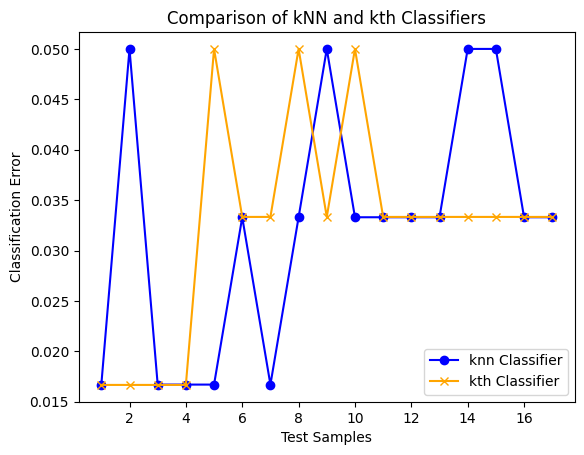

In [ ]:
import matplotlib.pyplot as plt

# Using classification errors obtained from Matlab script for kNN classifier
#error_knn= [0.0167, 0.0500, 0.0167, 0.0167, 0.0167, 0.0333, 0.0167, 0.0333, 0.0500, 0.0333, 0.0333, 0.0333, 0.0333, 0.0500, 0.0500, 0.0333, 0.0333]
#Plotting knn classifier errors
plt.plot(x, error[0], label='knn Classifier', marker='o', color='blue')
plt.plot(x, error_knn, label='knn Classifier', marker='o', color='blue')

# Plotting kth classifier errors
plt.plot(x, error[1], label='kth Classifier', marker='x', color='orange')

# Adding labels and title
plt.xlabel('Test Samples')
plt.ylabel('Classification Error')
plt.title('Comparison of kNN and kth Classifiers')
plt.legend()  # Show legend

# Show the plot
plt.show()

# Classification of 7 test vectors for k = 1 and k = 2

In [ ]:
test_vectors = [[2.0, 0.8], [4.0, 0.8], [6.5, 2.5], [4.5, 1.7], [4.8, 1.8], [5.0, 1.8], [5.0, 1.5]]
y_test = [0, 1, 2, 2, 2, 1, 2]

In [ ]:
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

In [ ]:
X_train_integer = np.round(10*np.array(X))
test_vectors_integer = np.round(10*np.array(test_vectors))

In [ ]:
k = 1

In [ ]:
kth_per_class_classifier = KthPerClassClassifier(k=k)
kth_per_class_classifier.fit(X_train_integer, y)
pred_kth = kth_per_class_classifier.predict(test_vectors_integer)

In [ ]:
pred_kth

[0, 1, 2, 2, 1, 1, 2]

['setosa' 'versicolor' 'virginica']


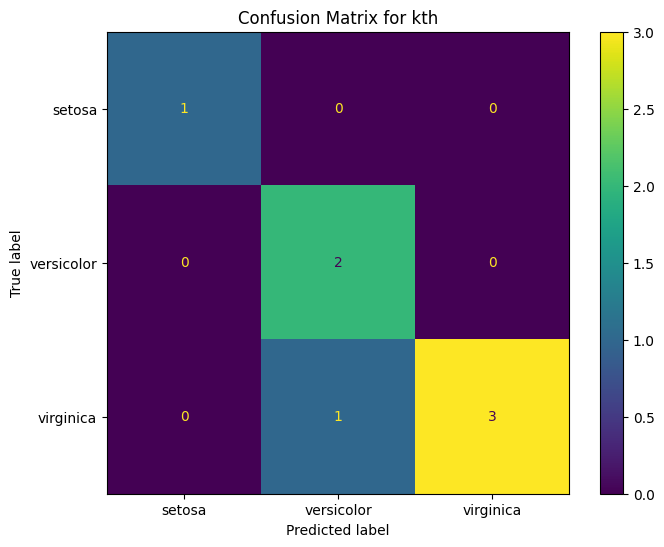

In [ ]:
#confusion_matrix_knn = confusion_matrix(y_test , pred_knn)
confusion_matrix_kth = confusion_matrix(y_test , pred_kth)
print(iris.target_names)
# Display the confusion matrices with labels
#disp_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=iris.target_names)
disp_kth = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_kth, display_labels=iris.target_names)

# Plot the confusion matrices
#disp_knn.plot(cmap='viridis', ax=ax[0])
#ax[0].set_title("Confusion Matrix for knn")

# Plot the confusion matrices
fig, ax = plt.subplots(figsize=(8, 6))
disp_kth.plot(cmap='viridis', ax=ax)
ax.set_title("Confusion Matrix for kth")

plt.show()

In [ ]:
k=2

In [ ]:
kth_per_class_classifier = KthPerClassClassifier(k=k)
kth_per_class_classifier.fit(X_train_integer, y)
pred_kth = kth_per_class_classifier.predict(test_vectors_integer)
pred_kth

[0, 1, 2, 1, 2, 2, 1]

['setosa' 'versicolor' 'virginica']


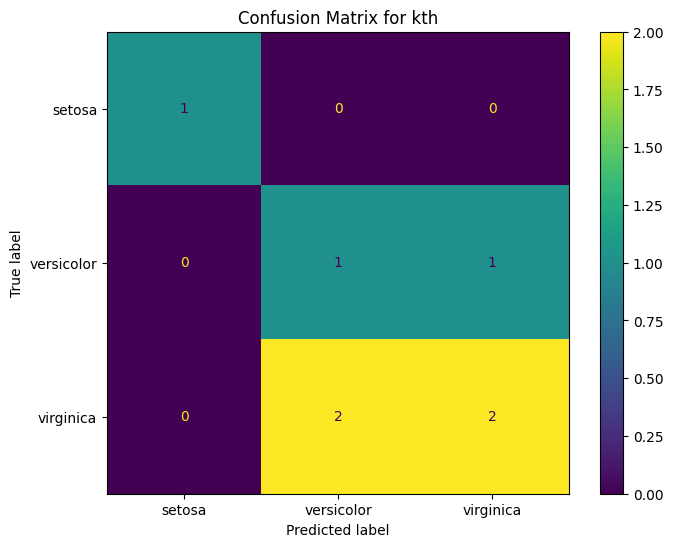

In [ ]:
#confusion_matrix_knn = confusion_matrix(y_test , pred_knn)
confusion_matrix_kth = confusion_matrix(y_test , pred_kth)
print(iris.target_names)
# Display the confusion matrices with labels
#disp_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=iris.target_names)
disp_kth = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_kth, display_labels=iris.target_names)

# Plot the confusion matrices
#disp_knn.plot(cmap='viridis', ax=ax[0])
#ax[0].set_title("Confusion Matrix for knn")

# Plot the confusion matrices
fig, ax = plt.subplots(figsize=(8, 6))
disp_kth.plot(cmap='viridis', ax=ax)
ax.set_title("Confusion Matrix for kth")

plt.show()

In [ ]:
pe(confusion_matrix_kth, 7)

0.4285714285714286

# Plotting scatter plot of training and testing data for Nt=30

In [ ]:
import plotly.express as px

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target
Nt = 30
X_train_integer = np.round(10 * np.array(X))

if Nt > 50:
    print("Invalid Nt")
else:
    train_data, test_data, train_labels, test_labels = splitdata(X_train_integer, y, Nt)

# Scatter plot
fig = px.scatter(x=train_data[:, 0], y=train_data[:, 1], color=train_labels,
                 title='Scatter Plot of Iris Dataset (Petal Width vs Petal Length)',
                 labels={'x': 'Petal Width (cm)', 'y': 'Petal Length (cm)'})
fig.add_trace(px.scatter(x=test_data[:, 0], y=test_data[:, 1], color_discrete_sequence=['black'],
                         title='Scatter Plot of Iris Dataset (Petal Width vs Petal Length)',
                         labels={'x': 'Petal Width (cm)', 'y': 'Petal Length (cm)'}).update_traces(marker=dict(symbol='x')).data[0])
#fig.add_trace(px.scatter(x=test_data[:, 0], y=test_data[:, 1]))#, color_discrete_sequence=['black'])) #,
                          # marker=dict(symbol='x'), name='Test Vectors').data[0])

fig.show()